In [12]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import pickle

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPatch

from abutils.core.lineage import group_lineages, donut
from abutils.utils.color import hex_to_rgb

%matplotlib inline

## Load sequences

In [8]:
with open('../data/zika_mAbs.pkl', 'rb') as f:
    all_pairs = pickle.load(f)

d1_pairs = [p for p in pairs if p.subject == 'donor_1']
d2_pairs = [p for p in pairs if p.subject == 'donor_2']
d3_pairs = [p for p in pairs if p.subject == 'donor_3']
d4_pairs = [p for p in pairs if p.subject == 'donor_4']

## Group sequences into lineages


In [39]:
d1_lineages = group_lineages(d1_pairs)
d2_lineages = group_lineages(d2_pairs)
d3_lineages = group_lineages(d3_pairs)
d4_lineages = group_lineages(d4_pairs)

<br>Let's pick a lineage from Donor 3 so that we can learn a bit more about the Lineage object

In [57]:
l = d3_lineages[6]

<br>Lineage objects have a `size` attribute as well as a `name` attribute

In [58]:
print(l.name)

N5JLX8BI


In [60]:
print(l.size())

54


<br>If we pass the `pairs_only` keyword when checking the lineage size, we'll learn the number of heavy/light pairs (excluding unpaired sequences)

In [61]:
print(l.size(pairs_only=True))

50


<br>`Lineage` objects also have a built-in method for making dot alignments. This is slightly different from the dot alignment we made earlier, as calling the lineage-specific method aligns all sequences to the 'Unmutated Common Ancestor" (or UCA).

In [52]:
print(l.dot_alignment(seq_field='vdj_aa', chain='heavy'))

UCA          QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLEWIGYIYYSGSTNYNPSLKSRVTISVDTSKNQFSLKLSSVTAADTAVYYCARLYYYDSSGYYCNWFDPWGQGTLVTVSS
H066444-B11  ...............Q......S......TAH...................DN....K.S....G...M.....N.......R.................S..GIT..................
H066476-A03  ...............Q......S......TTHF..................DN..N.K.S......................R....................GIN..................
H066473-A07  ...............Q......S.......TH...................DD....K.S...R..........N.......R....................GIT..................
H066472-G10  ......................S.......AH...................DNT...K.S......L.......N.......R....................GIN..................
H066476-B10  ...............Q......S........H...................DN..T.K.S......................R....................GIN..................
H066473-G09  ...............Q......S.......TH.......A...........DN......S..............N.......R....................GIT..................
H066530-H01  ...............Q.....

## Donors and colors

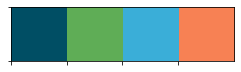

In [9]:
donors = ['donor_1', 'donor_2', 'donor_3', 'donor_4']
colors = ['#004E64', '#5FAD56', '#3AAED8', '#F78154']
color_dict = {d: c for d, c in zip(donors, clist)}

def clist_rgba(alpha):
    clist_rgb = [[rgb / 256 for rgb in hex_to_rgb(c)] for c in clist]
    return [rgb + [alpha] for rgb in clist_rgb]

sns.palplot(colors)

## Lineage 'donut' plots

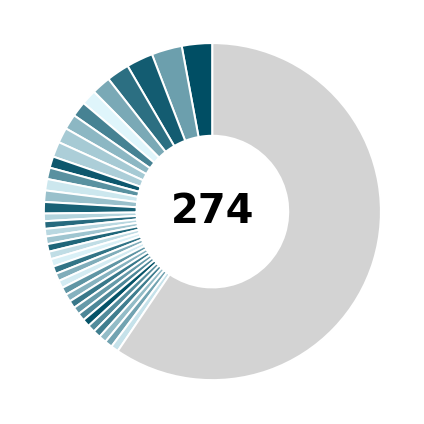

In [22]:
donut(d1_lineages,
      monochrome_color=color_dict['donor_1'], 
      shuffle_colors=True,
      text_kws={'size': 40},
      seed=12,
#     figfile='./figures/donor1_donut.pdf'
     )